# Configs


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import platform
import ast
from cycler import cycler
import matplotlib.animation as animation

PROJ_DIR = os.environ.get("PROJ_DIR")
if PROJ_DIR is None:
    raise ValueError("Environment variable PROJ_DIR not set")
if not os.path.exists(PROJ_DIR):
    raise FileNotFoundError(f"Project dir not found: {PROJ_DIR}")

DIR_SUFFIX = os.environ.get("DIR_SUFFIX")
if DIR_SUFFIX is None:
    DIR_SUFFIX = input("Enter a suffix for the directories, e.g '/0.6dist-16migr-2160steps/2024-11-28_21-06-53': ")

LOGS_DIR = f"{PROJ_DIR}/logs.all{DIR_SUFFIX}"
if not os.path.exists(LOGS_DIR):
    raise FileNotFoundError(f"Logs dir not found: {LOGS_DIR}")
PLOTS_DIR = f"{PROJ_DIR}/plots{DIR_SUFFIX}"
os.makedirs(PLOTS_DIR, exist_ok=True)

print(f"Logs dir: {LOGS_DIR}")
print(f"Plots dir: {PLOTS_DIR}")

DAY_START_IN_MINUTES = 5 * 60
DAY_END_IN_MINUTES = 23 * 60
DAY_CYCLE_IN_MINUTES = DAY_END_IN_MINUTES - DAY_START_IN_MINUTES

SHOW_TITLES = False

Logs dir: /home/albuquerque/espy-user-mobility/logs.all/scenario-3_sort-by-user-dis/0.6dist-8migr-2160steps/2024-12-18_11-38-26
Plots dir: /home/albuquerque/espy-user-mobility/plots/scenario-3_sort-by-user-dis/0.6dist-8migr-2160steps/2024-12-18_11-38-26


In [ ]:
df_edge_server = pd.read_csv(f"{LOGS_DIR}/EdgeServer.csv", low_memory=False)

In [ ]:
# Calculate the mean of "Resource Score" for each "Time Step"
mean_resource_score_edge_cloud = df_edge_server.groupby("Time Step")["Resources Score"].mean()

# Plot the mean "Resource Score" over "Time Step"
plt.figure(figsize=(12, 8), layout="constrained")
plt.plot(mean_resource_score_edge_cloud.index, mean_resource_score_edge_cloud.values)
plt.xlabel("Time Step")
plt.ylabel("Mean Resource Score")
plt.title("Mean Resource Score (Edge and Cloud) over Time Steps") if SHOW_TITLES else None
plt.grid(True)
print(f"Saving plot to {PLOTS_DIR}/mean_resource_score_edge_cloud.png")
plt.savefig(f"{PLOTS_DIR}/mean_resource_score_edge_cloud.png")

In [ ]:
# Calculate the mean of "Resource Score" for each "Time Step"
mean_resource_score_edge_only = (
    df_edge_server[df_edge_server["Model Name"] != "CLOUD"].groupby("Time Step")["Resources Score"].mean()
)

# Plot the mean "Resource Score" over "Time Step"
plt.figure(figsize=(12, 8), layout="constrained")
plt.plot(mean_resource_score_edge_only.index, mean_resource_score_edge_only.values)
plt.xlabel("Time Step")
plt.ylabel("Mean Resource Score")
plt.title("Mean Resource Score (Edge only) over Time Steps") if SHOW_TITLES else None
plt.grid(True)
print(f"Saving plot to {PLOTS_DIR}/mean_resource_score_edge_only.png")
plt.savefig(f"{PLOTS_DIR}/mean_resource_score_edge_only.png")

In [ ]:
# Calculate the mean of "Resource Score" for each "Time Step"
mean_resource_score_cloud_only = (
    df_edge_server[df_edge_server["Model Name"] == "CLOUD"].groupby("Time Step")["Resources Score"].mean()
)

# Plot the mean "Resource Score" over "Time Step"
plt.figure(figsize=(12, 8), layout="constrained")
plt.plot(mean_resource_score_cloud_only.index, mean_resource_score_cloud_only.values)
plt.xlabel("Time Step")
plt.ylabel("Mean Resource Score")
plt.title("Mean Resource Score (Cloud only) over Time Steps") if SHOW_TITLES else None
plt.grid(True)
print(f"Saving plot to {PLOTS_DIR}/mean_resource_score_cloud_only.png")
plt.savefig(f"{PLOTS_DIR}/mean_resource_score_cloud_only.png")

In [ ]:
# Calculate the mean "Resource Score" for each "Model Name" grouped by "Time Step"
mean_resource_score_model = df_edge_server.groupby(["Time Step", "Model Name"])["Resources Score"].mean().unstack()

# Plot the mean "Resource Score" for each "Model Name" over "Time Step"
plt.figure(figsize=(12, 8), layout="constrained")
for model in mean_resource_score_model.columns:
    plt.plot(mean_resource_score_model.index, mean_resource_score_model[model], label=model)

plt.xlabel("Time Step")
plt.ylabel("Mean Resource Score")
plt.title("Mean Resource Score over Time Steps by Model Name") if SHOW_TITLES else None
plt.legend(title="Model Name")
plt.grid(True)
print(f"Saving plot to {PLOTS_DIR}/mean_resource_score_by_model.png")
plt.savefig(f"{PLOTS_DIR}/mean_resource_score_by_model.png")

In [ ]:
df_service = pd.read_csv(f"{LOGS_DIR}/Service.csv", low_memory=False)

In [ ]:
# Calculate the mean "Total Distance From Users" for each "Time Step"
mean_service_distance_from_users = df_service.groupby("Time Step")["Total Distance From Users"].mean()

# Plot the mean "Total Distance From Users" over "Time Step"
plt.figure(figsize=(12, 8), layout="constrained")
plt.plot(mean_service_distance_from_users.index, mean_service_distance_from_users.values)
plt.xlabel("Time Step")
plt.ylabel("Mean Normalized Distance from Services to Users")
plt.title("Mean Normalized Distance from Services to Users over Time Steps") if SHOW_TITLES else None
plt.grid(True)
print(f"Saving plot to {PLOTS_DIR}/mean_normalized_distance_from_service_to_users.png")
plt.savefig(f"{PLOTS_DIR}/mean_normalized_distance_from_service_to_users.png")

In [ ]:
# Sample data
x = np.linspace(0, 10, 100)  # X-axis values
y1 = np.sin(x)  # First Y-axis values
y2 = np.exp(0.3 * x)  # Second Y-axis values

# Create a figure and axis
fig, ax1 = plt.subplots(layout="constrained")
fig.set_size_inches(12, 8)

# Plot the first Y-axis
ax1.plot(
    mean_service_distance_from_users.index,
    mean_service_distance_from_users.values,
    "b-",
    label="Normalized Distance from Services to Users",
)
ax1.set_xlabel("Time Step")
ax1.set_ylabel("Mean Normalized Distance from Services to Users", color="b")
ax1.tick_params(axis="y", labelcolor="b")
ax1.grid(True)
ax1.legend(loc="upper left")

# Create a second Y-axis
ax2 = ax1.twinx()
ax2.plot(
    mean_resource_score_edge_only.index, mean_resource_score_edge_only.values, "r--", label="Mean Resource Score (Edge only)"
)
ax2.set_ylabel("Mean Resource Score (Edge only)", color="r")
ax2.tick_params(axis="y", labelcolor="r")
ax2.legend(loc="upper right")

# Show the plot
plt.title("Mean Total Distance From Users & Mean Resource Score over Time Steps over Time Steps") if SHOW_TITLES else None
plt.tight_layout()
print(f"Saving plot to {PLOTS_DIR}/mean_normalized_distance_from_service_to_users_and_mean_resource_score_edge_only.png")
plt.savefig(f"{PLOTS_DIR}/mean_total_distance_from_users_and_mean_resource_score_edge_only.png")


In [4]:
df_user = pd.read_csv(f"{LOGS_DIR}/User.csv", low_memory=False)
df_user["Coordinates"] = df_user["Coordinates"].apply(ast.literal_eval)

In [ ]:
def mean_delay_for_all_keys(delays: dict | str) -> float:
    if isinstance(delays, str):
        delays = delays.replace("inf", "float('inf')")  # type: ignore
        delays = eval(delays)  # type: ignore
    if len(delays) == 0 or delays is None:
        return np.nan
    return float(np.mean([delay for _, delay in delays.items()]))


df_user["Delay"] = df_user["Delays"].apply(mean_delay_for_all_keys)
mean_delay = df_user.groupby("Time Step")["Delay"].mean()


plt.figure(figsize=(12, 8), layout="constrained")
plt.plot(mean_delay.index, mean_delay.values)
plt.xlabel("Time Step")
plt.ylabel("Mean Delay from Users to Apps")
plt.title("Mean Delay for all Apps over Time Steps") if SHOW_TITLES else None
plt.grid(True)
print(f"Saving plot to {PLOTS_DIR}/mean_delay_all_apps.png")
plt.savefig(f"{PLOTS_DIR}/mean_delay_all_apps.png")

In [ ]:
# from scipy.special import erf

# mean_user_delays = df_user["Delays"].apply(mean_delay_for_all_keys).replace([np.inf, -np.inf], np.nan).dropna()

# plt.figure(figsize=(12, 8), layout="constrained")
# mean = mean_user_delays.mean()
# std = mean_user_delays.std()
# x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
# plt.plot(x, (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2), label="Normal Distribution")
# plt.hist(mean_user_delays, bins=30, density=True, alpha=0.6, color="g", label="DelayMean Histogram")
# plt.xlabel("DelayMean")
# plt.ylabel("Density")
# plt.title("Normal Distribution of DelayMean") if SHOW_TITLES else None
# plt.legend()
# plt.grid(True)
# print(f"Saving plot to {PLOTS_DIR}/normal_distribution_delay_mean.png")
# plt.savefig(f"{PLOTS_DIR}/normal_distribution_delay_mean.png")

# cdf = (1 + erf((x - mean) / (std * np.sqrt(2)))) / 2

# plt.figure(figsize=(12, 8), layout="constrained")
# plt.plot(x, cdf, label="CDF of Normal Distribution")
# plt.xlabel("DelayMean")
# plt.ylabel("CDF")
# plt.title("CDF of Normal Distribution of DelayMean") if SHOW_TITLES else None
# plt.legend()
# plt.grid(True)
# print(f"Saving plot to {PLOTS_DIR}/cdf_normal_distribution_delay_mean.png")
# plt.savefig(f"{PLOTS_DIR}/cdf_normal_distribution_delay_mean.png")

In [ ]:
# Group by "Time Step" and "Point of Interest" and count the number of users
poi_counts = df_user.groupby(["Time Step", "Point of Interest"]).size().unstack(fill_value=0)

# Plot the number of users interested in each "Point of Interest" over "Time Step"
fig = plt.figure(figsize=(12, 8), layout="constrained")
default_cycler = cycler(linestyle=["-", "--", ":", "-."]) * (
    cycler(
        color=[
            "tab:blue",
            "tab:red",
            "tab:green",
            "tab:purple",
            "tab:pink",
            "tab:brown",
            "tab:orange",
            "tab:gray",
            "tab:olive",
            "tab:cyan",
        ]
    )
)
plt.rc("axes", prop_cycle=default_cycler)
for poi in poi_counts.columns:
    plt.plot(poi_counts.index, poi_counts[poi], label=poi)

plt.xlabel("Time Step")
plt.ylabel("Number of Users")
plt.title("Number of Users Interested in Each Point of Interest Over Time Steps") if SHOW_TITLES else None
fig.legend(title="Point of Interest", loc="outside lower center", ncols=10)
plt.grid(True)
print(f"Saving plot to {PLOTS_DIR}/number_of_users_interested_in_each_poi.png")
plt.savefig(f"{PLOTS_DIR}/number_of_users_interested_in_each_poi.png")

In [2]:
df_poi = pd.read_csv(f"{LOGS_DIR}/PointOfInterest.csv", low_memory=False)
df_poi["Coordinates"] = df_poi["Coordinates"].apply(ast.literal_eval)

Saving animation to /home/albuquerque/espy-user-mobility/plots/scenario-3_sort-by-user-dis/0.6dist-8migr-2160steps/2024-12-18_11-38-26/user_coordinates.mov


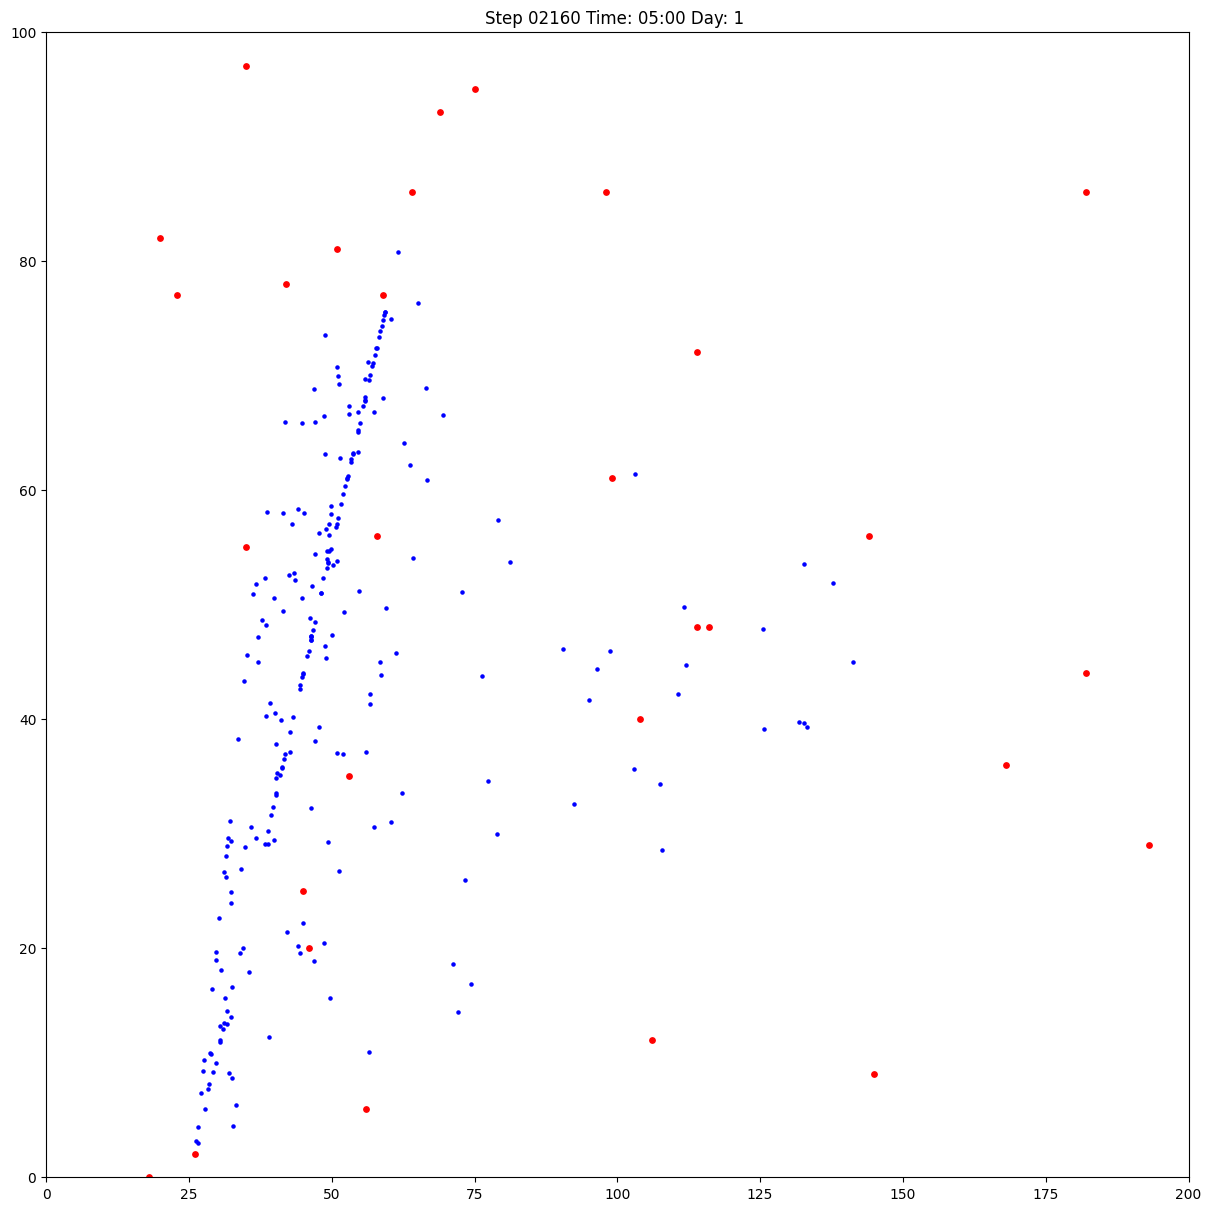

In [5]:
def step_to_datetime(step: int) -> str:
    """Converts a step to a datetime string."""
    time_of_day_in_minutes = step % DAY_CYCLE_IN_MINUTES + DAY_START_IN_MINUTES
    hours = time_of_day_in_minutes // 60
    minutes = time_of_day_in_minutes % 60
    return (
        f"Step {step:05d} "
        + f"Time: {hours:02d}:{minutes % 60:02d} "
        + f"Day: {time_of_day_in_minutes // DAY_CYCLE_IN_MINUTES + 1} "
    )


df_poi_inactive = df_poi[df_poi["Is in peak"] == False]  # noqa: E712
df_poi_active = df_poi[df_poi["Is in peak"] == True]  # noqa: E712


# Extract unique time steps
unique_time_steps = df_user["Time Step"].unique()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12), layout="constrained")

# Initialize the scatter plot
scatter_user = ax.scatter([], [], c="blue", s=5, label="User")
scatter_poi_inactive = ax.scatter([], [], c="red", s=15, label="Point of Interest (Inactive)")
scatter_poi_active = ax.scatter([], [], c="green", s=15, label="Point of Interest (Active)")

# Set axis limits
ax.set_xlim(0, 200)
ax.set_ylim(0, 100)


def update(frame):
    # Filter coordinates for the current time step
    current_coords_user = df_user[df_user["Time Step"] == frame]["Coordinates"].tolist()
    current_coords_poi_inactive = df_poi_inactive[df_poi_inactive["Time Step"] == frame]["Coordinates"].tolist()
    current_coords_poi_active = df_poi_active[df_poi_active["Time Step"] == frame]["Coordinates"].tolist()

    current_coords_poi_inactive = current_coords_poi_inactive if len(current_coords_poi_inactive) > 0 else [[-1, -1]]
    current_coords_poi_active = current_coords_poi_active if len(current_coords_poi_active) > 0 else [[-1, -1]]

    # Update scatter plot data
    scatter_user.set_offsets(current_coords_user)
    scatter_poi_inactive.set_offsets(current_coords_poi_inactive)
    scatter_poi_active.set_offsets(current_coords_poi_active)

    ax.set_title(step_to_datetime(frame))

    return (scatter_user, scatter_poi_inactive, scatter_poi_active)


# Create the animation
ani = animation.FuncAnimation(fig, update, frames=unique_time_steps, blit=True)

# Display the animation
print(f"Saving animation to {PLOTS_DIR}/user_coordinates.mov")
ani.save(f"{PLOTS_DIR}/user_coordinates.mov", writer="ffmpeg", fps=30)